In [13]:
#%matplotlib qt5
%matplotlib notebook
from modsim import *
from pandas import read_html


In [14]:
filename = 'data/returnedsalmonpopulation.html'
tables = read_html(filename, header=1, index_col=0, decimal='M')

In [15]:
table1 = tables[0]
table1

,1SW,2SW,3SW,Repeat,Total,Harchery,Natural
Year,,,,,,,
1967,75,574,39,93,781,114,667
1968,18,498,12,56,584,314,270
1969,32,430,16,34,512,108,404
1970,9,539,15,17,580,162,418
1971,31,407,11,5,454,177,277
1972,24,946,38,17,1025,495,530
1973,18,623,8,13,662,422,240
1974,52,791,35,25,903,639,264
1975,77,1250,14,30,1371,1126,245


In [16]:
total = table1.Total
hatched = table1.Harchery
def plot_spawnerfish(table):
    """Plot Salmon hatched population estimates.
    
    table: DataFrame with columns 'hatched'
    """
    
    plot(hatched, '-', color='red', label='Total Hatched Spawner fish population')
    
    decorate(xlabel='Year',
             ylabel='Hatched Salmon population (billion)')

<IPython.core.display.Javascript object>


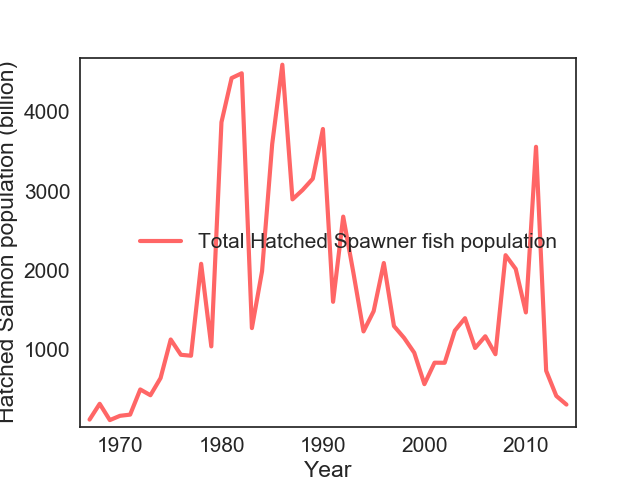

In [17]:
newfig()
plot_spawnerfish(table1)

In [22]:
def plot_estimates(table):
    """Plot Salmon population estimates.
    
    table: DataFrame with columns 'total'
    """
    
    plot(total, '-', color='darkblue', label='Total Returned Salmon Population')
    
    decorate(xlabel='Year',
             ylabel='Salmon population (metric tons)')

<IPython.core.display.Javascript object>


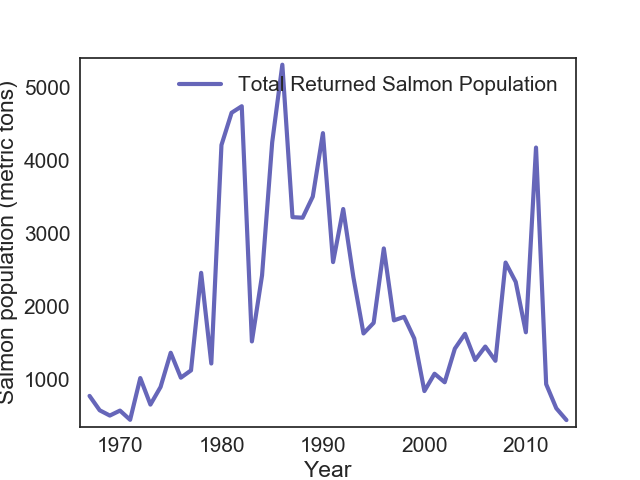

In [23]:
newfig()
plot_estimates(table1)

In [24]:
Atlantic_Salmon_population = System(pop0 = 781, price0 = 8, t0 = 1967, t_end = 2020)
spawnerfish_survival_rate = 0.8
salmon_death_rate = 0.38
natural_growth_rate = 0.25

In [25]:
def spawner_fish_change(system, s):
    """have more or less spawner fish.
    
    system: Salmon System object
    n: the number of spawner fish the fish farming industry decide to input
    """
    spawner_fish = s
    system.pop0 += spawner_fish * spawnerfish_survival_rate 

In [26]:
def harvested_fish_change(system, h):
    """have more or less harvested fish.
    
    system: Salmon System object
    n: the number of harvested fish the fish farming industry decide to output
    """
    harvested_fish = h
    system.pop0 -= harvested_fish

In [27]:
def salmon_natural_growth(system):
    system.pop0 += system.pop0 * natural_growth_rate
    

In [28]:
def step(system, p_illegalfishing, p_disease):
    """Simulate the given number of time steps.
    
    system: Salmon population system object
    num_steps: number of time steps
    p_illegalfishing: probability of the occurance of an illegal fishing activity
    p_disease: probability of an unexpected natural disaster or disease"""
    if flip(p_illegalfishing):
        system.pop0 -= system.pop0 * 0.1
    
    if flip(p_disease):
        system.pop0 -= system.pop0 * salmon_death_rate
    return system.pop0

def run_simulation_1year(system, p_illegalfishing, p_disease, s, h):
    """simulate all the changes that would happen to salmon population"""
    spawner_fish_change(system, s)
    harvested_fish_change(system, h)
    salmon_natural_growth(system)
    step(system, p_illegalfishing, p_disease)
    return system.pop0


def run_simulation_1timeserie(system, p_illegalfishing, p_disease, s, h):
    """simulate 1st timeserie"""
    salmon1 = TimeSeries()
    Atlantic_Salmon_population.pop0 = 781
    salmon1[Atlantic_Salmon_population.t0] = Atlantic_Salmon_population.pop0
    for t in linrange(Atlantic_Salmon_population.t0, Atlantic_Salmon_population.t_end):
        salmon1[t+1] = run_simulation_1year(system, p_illegalfishing, p_disease, s, h)
    Atlantic_Salmon_population.salmon1 = salmon1

run_simulation_1timeserie(Atlantic_Salmon_population, 0.4, 0.6, 600, 200)


In [29]:
def run_simulation_1timeserie(system, p_illegalfishing, p_disease, s, h):
    """simulate 2nd timeserie"""
    salmon2 = TimeSeries()
    Atlantic_Salmon_population.pop0 = 781
    salmon2[Atlantic_Salmon_population.t0] = Atlantic_Salmon_population.pop0
    for t in linrange(Atlantic_Salmon_population.t0, Atlantic_Salmon_population.t_end):
        salmon2[t+1] = run_simulation_1year(system, p_illegalfishing, p_disease, s, h)
    Atlantic_Salmon_population.salmon2 = salmon2

run_simulation_1timeserie(Atlantic_Salmon_population, 0.4, 0.6, 600, 200)


In [30]:
def run_simulation_1timeserie(system, p_illegalfishing, p_disease, s, h):
    """simulate 3rd timeserie"""
    salmon3 = TimeSeries()
    Atlantic_Salmon_population.pop0 = 781
    salmon3[Atlantic_Salmon_population.t0] = Atlantic_Salmon_population.pop0
    for t in linrange(Atlantic_Salmon_population.t0, Atlantic_Salmon_population.t_end):
        salmon3[t+1] = run_simulation_1year(system, p_illegalfishing, p_disease, s, h)
    Atlantic_Salmon_population.salmon3 = salmon3

run_simulation_1timeserie(Atlantic_Salmon_population, 0.4, 0.6, 600, 200)


<IPython.core.display.Javascript object>


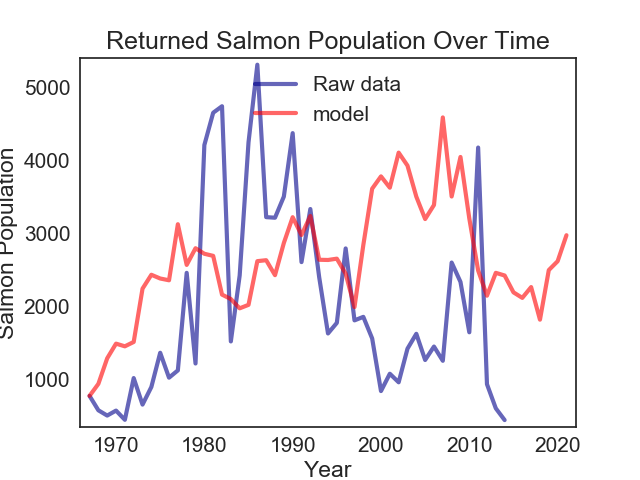

In [31]:
salmon_average = TimeSeries()
Atlantic_Salmon_population.salmon_average = salmon_average = (Atlantic_Salmon_population.salmon1 + Atlantic_Salmon_population.salmon2 + Atlantic_Salmon_population.salmon3)/3
salmon_average
newfig()
plot(total, '-', color='darkblue', label='Raw data')
plot(salmon_average, '-', color='red', label='model')
def decorate():
    """Add a legend and label the axes.
    """
    legend(loc='best')
    label_axes(title='Returned Salmon Population Over Time',
               xlabel='Year', 
               ylabel='Salmon Population')
decorate()

In [ ]:
price = TimeSeries()
price[Atlantic_Salmon_population.t0] = Atlantic_Salmon_population.price0
for t in linrange(Atlantic_Salmon_population.t0, Atlantic_Salmon_population.t_end):
    price[t+1] = price[t]*(salmon_average[t]/salmon_average[t+1])
Atlantic_Salmon_population.price = price
newfig()
plot(Atlantic_Salmon_population.price, '-', color='red', label='model')
def decorate():
    """Add a legend and label the axes.
    """
    legend(loc='best')
    label_axes(title='Salmon Price Over Time',
               xlabel='Year', 
               ylabel='Salmon Price(US Dollar per Kilogram)')
decorate()

In [ ]:
def populationchange_time(system):
    derivative = TimeSeries()
    derivative[system.t0] = 0
    for t in linrange(Atlantic_Salmon_population.t0, Atlantic_Salmon_population.t_end):
        derivative[t+1] = salmon_average[t+1] - salmon_average[t]
    Atlantic_Salmon_population.derivative = derivative
populationchange_time(Atlantic_Salmon_population)
newfig()
plot(Atlantic_Salmon_population.salmon_average.values, Atlantic_Salmon_population.derivative.values, 'rs', label = 'net growth rate')
Atlantic_Salmon_population.derivative
def decorate():
    """Add a legend and label the axes.
    """
    legend(loc='best')
    label_axes(title='Returned Salmon Population Carrying Capacity',
               xlabel='Returned Salmon Population', 
               ylabel='Returned Salmon Population Net Growth')
decorate()

In [ ]:
p_array1 = linspace(0,1,100)
def parameter_sweep_p_illegalfishing(array):
    salmon_parametersweep = System(pop0 = 781)
    for p_illegalfishing in array:
        salmonpop = run_simulation_1year(salmon_parametersweep, p_illegalfishing, 0.6, 500, 200)
        plot(p_illegalfishing, salmonpop, 'bs:', label='Ilegal Fishing Activity')
newfig()
parameter_sweep_p_illegalfishing(p_array1)
def decorate():
    """Add a legend and label the axes.
    """
    legend(loc='best')
    label_axes(title='Returned Salmon Population Over Probability of Ilegal Fishing Activity',
               xlabel='Probability of Ilegal Fishing Activity', 
               ylabel='Returned Salmon Population')
decorate()

In [ ]:
p_array1 = linspace(0,1,60)
def parameter_sweep_p_disease(array):
    salmon_parametersweep = System(pop0 = 781)
    for p_disease in array:
        salmonpop = run_simulation_1year(salmon_parametersweep, 0.4, p_disease, 600, 200)
        plot(p_disease, salmonpop, 'go-', label='Natural Disaster and Disease')
newfig()
parameter_sweep_p_disease(p_array1)
def decorate():
    """Add a legend and label the axes.
    """
    legend(loc='best')
    label_axes(title='Returned Salmon Population Over Probability of Natural Disaster and Disease',
               xlabel='Probability of Natural Disaster and Disease', 
               ylabel='Returned Salmon Population')
decorate()

In [ ]:
def parameter_sweep_harvested(number):
    salmon_parametersweep = System(pop0 = 781)
    for h in range(number):
        Salmonpopulation =  run_simulation_1year(salmon_parametersweep, 0.4, 0.6, 600, h)
        plot(h, Salmonpopulation, 'bs:', label='Output Harvested Fish')

def parameter_sweep_spawner(number):
    salmon_parametersweep = System(pop0 = 781)
    for s in range(number):
        Salmonpopulation = run_simulation_1year(salmon_parametersweep, 0.4, 0.6, s, 200)
        plot(s, Salmonpopulation, 'rs-', label='Input Spawner Fish Population')
newfig()
parameter_sweep_spawner(700)
parameter_sweep_harvested(700)
def decorate():
    """Add a legend and label the axes.
    """
    legend(loc='best')
    label_axes(title='Returned Population with Salmon Farming',
               xlabel='Salmon Farming Production', 
               ylabel='Returned Salmon Population')
decorate()

In [ ]:
savefig('parametersweepfarming2.png')